In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import treeswift
import csv
import Utils
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from itertools import product
import numpy as np
import Utils
import os
import math

In [19]:

# Make csv file
file_path = "SP-Score-Analysis.csv"
header = ["Diameter Range", "Taxa Amount", "SP-Score Mafft", "SP-Score Clustalo", "SP-Score Linsi"]

with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    

In [20]:

# Get Data and append 
sub_list = "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\100Taxa.Diam", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\100Taxa.Diam-2", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200Taxa.Diam", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200TaxaDiam-2", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300TaxaDiam", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300TaxaDiam-2"
"C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200Taxa.Diam", 
"C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200Taxa.Diam-2", 
"C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300Taxa.Diam", 
"C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300Taxa.Diam-2"


#"C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\100Taxa.Diam-2","C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200Taxa.Diam", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200Taxa.Diam-2", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300Taxa.Diam", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300Taxa.Diam-2"


for folder in sub_list: 
    for i in range(100):
        tree_extension = folder + "\\Subtree" + str(i+1) + ".tree"
        SP_score_mafft = folder + "\\Subtree" + str(i+1) + ".mafft_accuracy"
        SP_score_clustalo = folder + "\\Subtree" + str(i+1) + ".clustalo_accuracy"
        SP_score_linsi = folder + "\\Subtree" + str(i+1) + ".mafftlinsi_accuracy"

        tree = treeswift.read_tree_newick(tree_extension)

        diam = tree.diameter()
        leaves = Utils.leaf_num(tree)

        with open(SP_score_mafft, "r") as file:
            mafft = float(file.readline().split()[1])
        
        with open(SP_score_clustalo, "r") as file:
            clustalo = float(file.readline().split()[1])

      # Check if the file SP_score_linsi exists
        if os.path.exists(SP_score_linsi):
            with open(SP_score_linsi, "r") as file:
                linsi = float(file.readline().split()[1])
        else:
            linsi = math.nan
            
        row = [diam,leaves,mafft,clustalo, linsi]

         # Append the row to the CSV file
        with open(file_path, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(row)

In [55]:
file_path= "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\Greedy Algorithm\SP-Score-Analysis.csv"
df = pd.read_csv(file_path)
df.sort_values(by='Diameter Range', ascending=True, inplace=True)
# Drop rows with missing values in any of the SP-Score columns
df = df.dropna(subset=['SP-Score Mafft', 'SP-Score Linsi', 'SP-Score Clustalo'])
print(df.shape)

(597, 5)


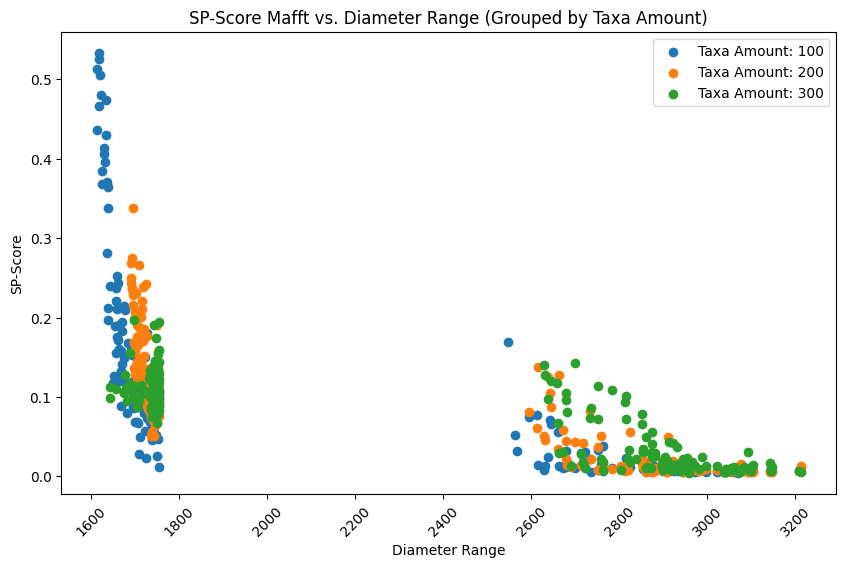

In [56]:
plt.figure(figsize=(10, 6))

for taxa_amount, taxa_data in df.groupby('Taxa Amount'):
    # Create the scatter plot for the taxa group
    plt.scatter(taxa_data['Diameter Range'], taxa_data['SP-Score Mafft'], label=f'Taxa Amount: {taxa_amount}')

plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('SP-Score Mafft vs. Diameter Range (Grouped by Taxa Amount)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

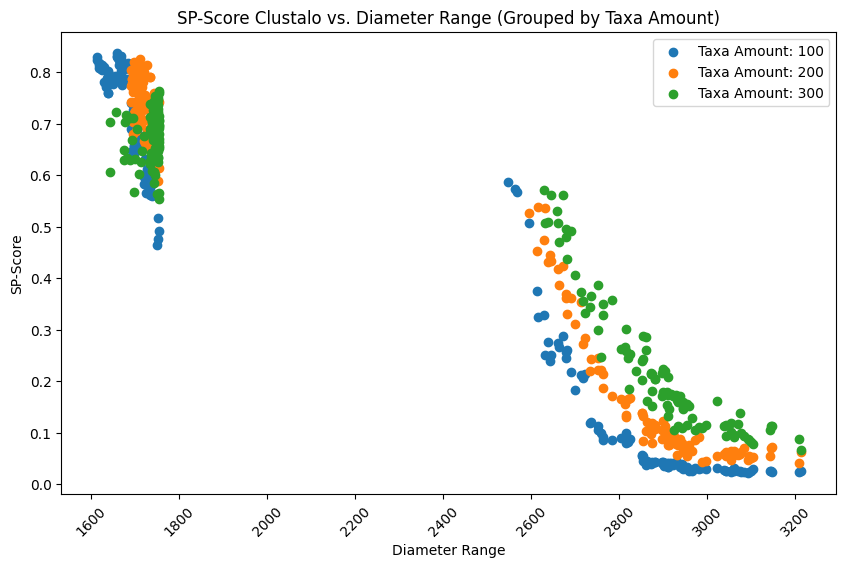

In [57]:
plt.figure(figsize=(10, 6))

for taxa_amount, taxa_data in df.groupby('Taxa Amount'):
    # Create the scatter plot for the taxa group
    plt.scatter(taxa_data['Diameter Range'], taxa_data['SP-Score Clustalo'], label=f'Taxa Amount: {taxa_amount}')

plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('SP-Score Clustalo vs. Diameter Range (Grouped by Taxa Amount)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

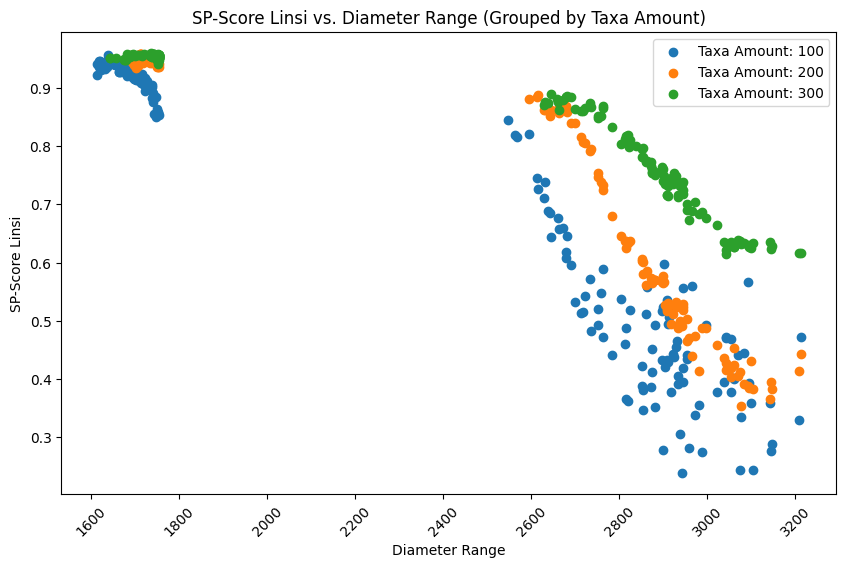

In [58]:
plt.figure(figsize=(10, 6))

for taxa_amount, taxa_data in df.groupby('Taxa Amount'):
    # Create the scatter plot for the taxa group
    plt.scatter(taxa_data['Diameter Range'], taxa_data['SP-Score Linsi'], label=f'Taxa Amount: {taxa_amount}')

plt.xlabel('Diameter Range')
plt.ylabel('SP-Score Linsi')
plt.title('SP-Score Linsi vs. Diameter Range (Grouped by Taxa Amount)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

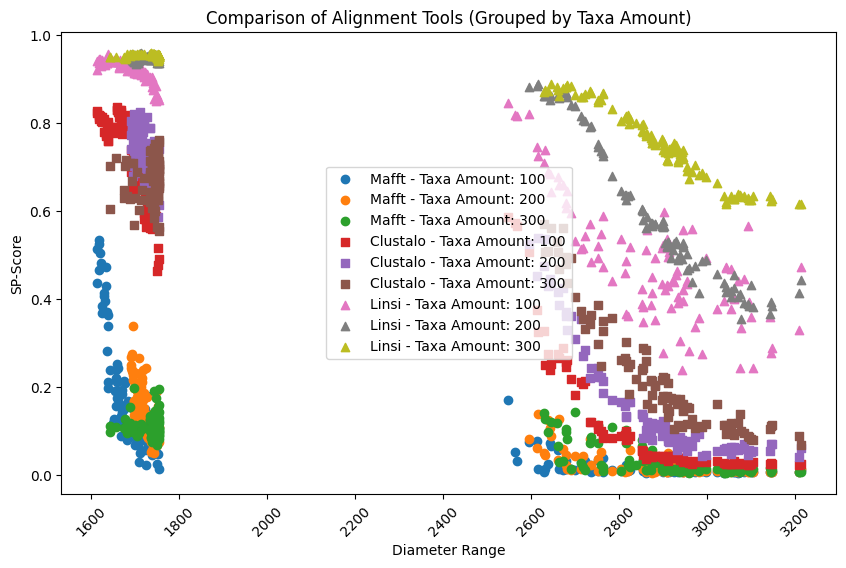

In [59]:


# Create a single figure to display all scatter plots
plt.figure(figsize=(10, 6))

# Plot scatter plot for SP-Score Mafft
for taxa_amount, taxa_data in df.groupby('Taxa Amount'):
    plt.scatter(taxa_data['Diameter Range'], taxa_data['SP-Score Mafft'], label=f'Mafft - Taxa Amount: {taxa_amount}')

# Plot scatter plot for SP-Score Clustalo
for taxa_amount, taxa_data in df.groupby('Taxa Amount'):
    plt.scatter(taxa_data['Diameter Range'], taxa_data['SP-Score Clustalo'], label=f'Clustalo - Taxa Amount: {taxa_amount}', marker='s')

# Plot scatter plot for SP-Score Linsi
for taxa_amount, taxa_data in df.groupby('Taxa Amount'):
    plt.scatter(taxa_data['Diameter Range'], taxa_data['SP-Score Linsi'], label=f'Linsi - Taxa Amount: {taxa_amount}', marker='^')

plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('Comparison of Alignment Tools (Grouped by Taxa Amount)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


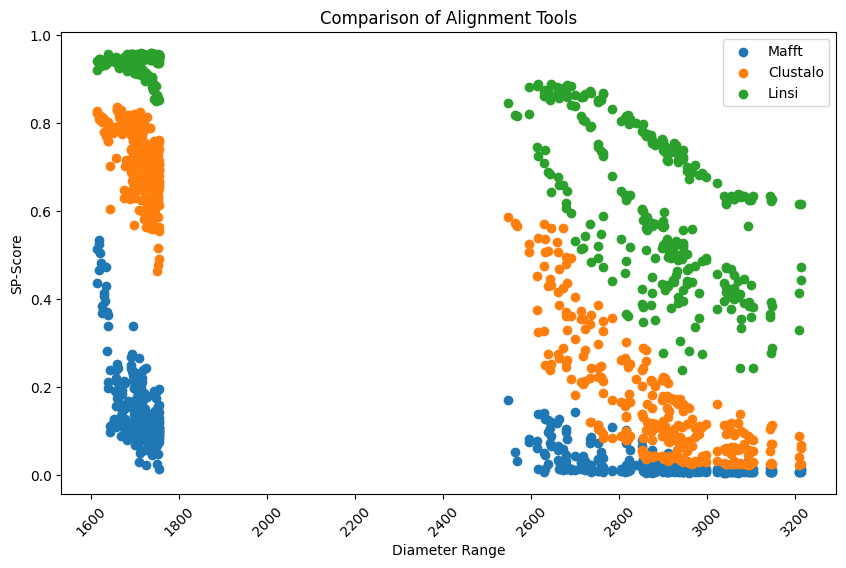

In [61]:


# Create a single figure to display all scatter plots
plt.figure(figsize=(10, 6))

# Plot scatter plot for SP-Score Mafft
plt.scatter(df['Diameter Range'], df['SP-Score Mafft'], label='Mafft')

# Plot scatter plot for SP-Score Clustalo
plt.scatter(df['Diameter Range'], df['SP-Score Clustalo'], label='Clustalo')

# Plot scatter plot for SP-Score Linsi
plt.scatter(df['Diameter Range'], df['SP-Score Linsi'], label='Linsi')

plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('Comparison of Alignment Tools')
plt.legend()
plt.xticks(rotation=45)
plt.show()


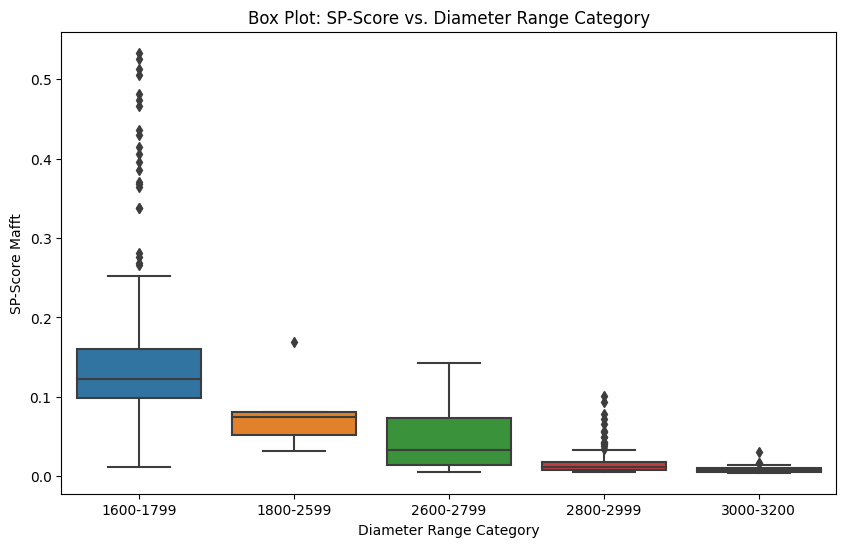

In [25]:

# Step 2: Define the diameter range categories
df['Diameter Category'] = pd.cut(df['Diameter Range'],
                                bins=[1600, 1800, 2600, 2800, 3000, 3200],
                                labels=['1600-1799', '1800-2599', '2600-2799', '2800-2999', '3000-3200'],
                                include_lowest=True)

# Step 3: Plot box plots for each diameter category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diameter Category', y='SP-Score Mafft', data=df)
plt.xlabel('Diameter Range Category')
plt.ylabel('SP-Score Mafft')
plt.title('Box Plot: SP-Score  Mafft vs. Diameter Range Category')
plt.show()



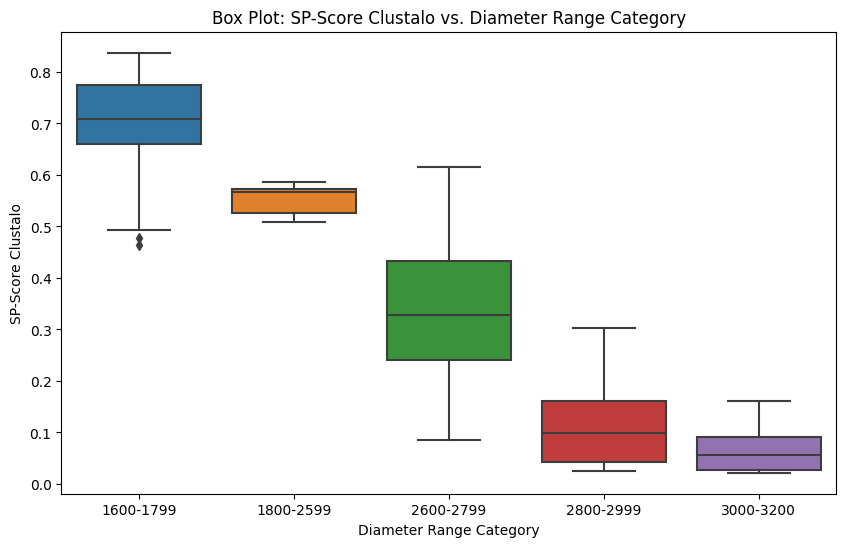

In [50]:

# Step 3: Plot box plots for each diameter category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diameter Category', y='SP-Score Clustalo', data=df)
plt.xlabel('Diameter Range Category')
plt.ylabel('SP-Score Clustalo')
plt.title('Box Plot: SP-Score Clustalo vs. Diameter Range Category')
plt.show()


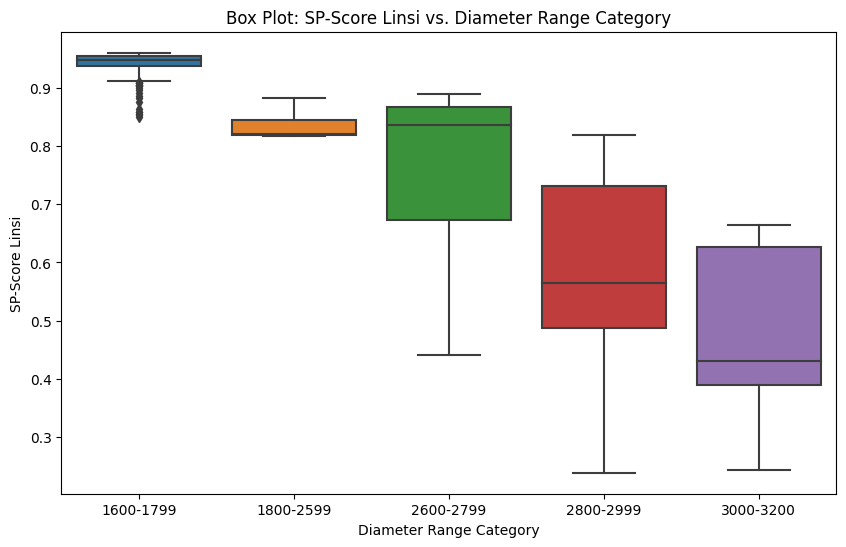

In [51]:

# Step 3: Plot box plots for each diameter category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diameter Category', y='SP-Score Linsi', data=df)
plt.xlabel('Diameter Range Category')
plt.ylabel('SP-Score Linsi')
plt.title('Box Plot: SP-Score Linsi vs. Diameter Range Category')
plt.show()



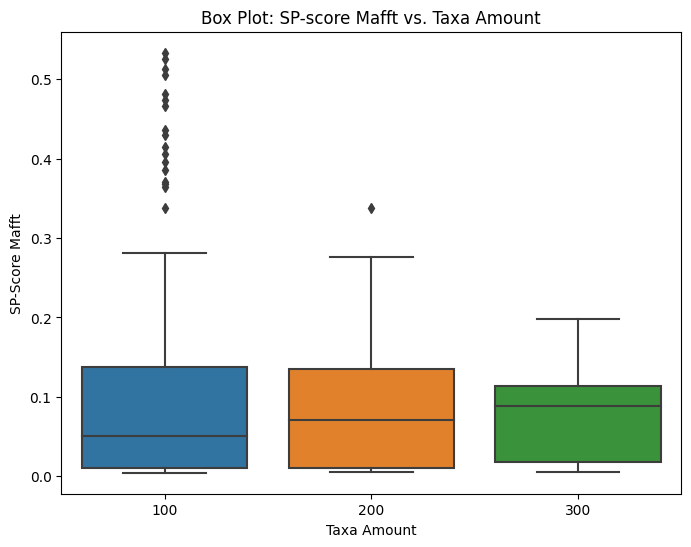

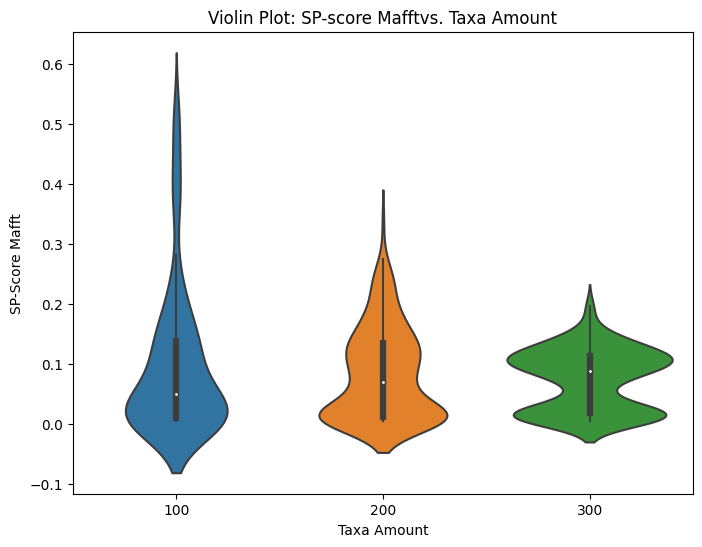

c:\Users\Carola\OneDrive\BRIDGE2023\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Carola\OneDrive\BRIDGE2023\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Carola\OneDrive\BRIDGE2023\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Carola\OneDrive\BRIDGE2023\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


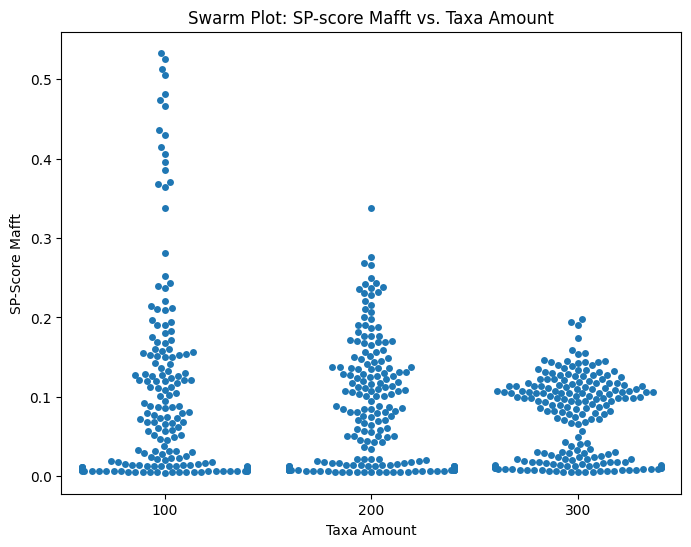

In [28]:
# Step 2: Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Taxa Amount', y='SP-Score Mafft', data=df)
plt.title('Box Plot: SP-score Mafft vs. Taxa Amount')
plt.show()

# Step 3: Plot the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Taxa Amount', y='SP-Score Mafft', data=df)
plt.title('Violin Plot: SP-score Mafftvs. Taxa Amount')
plt.show()

# Step 4: Plot the swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Taxa Amount', y='SP-Score Mafft', data=df)
plt.title('Swarm Plot: SP-score Mafft vs. Taxa Amount')
plt.show()


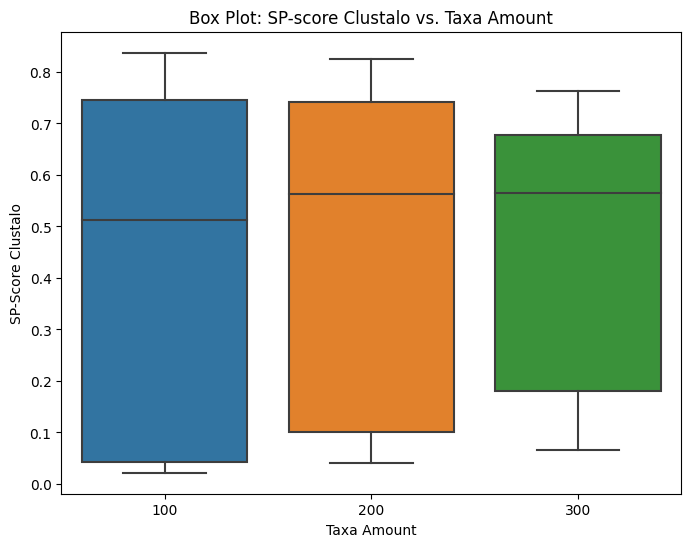

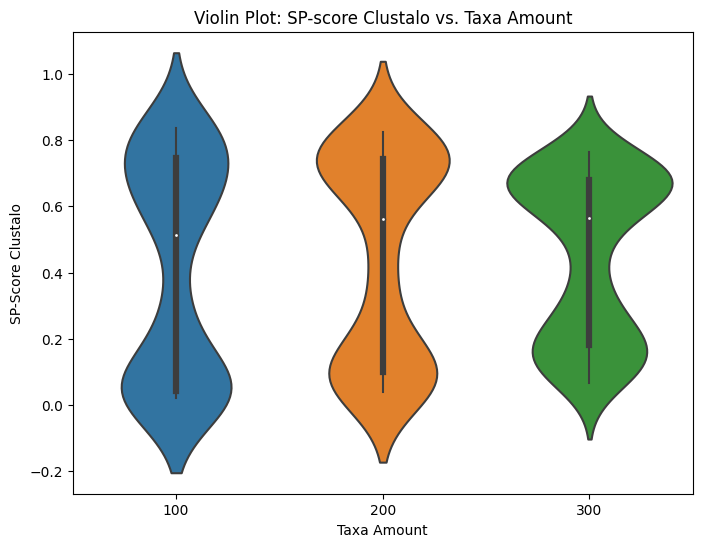

c:\Users\Carola\OneDrive\BRIDGE2023\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


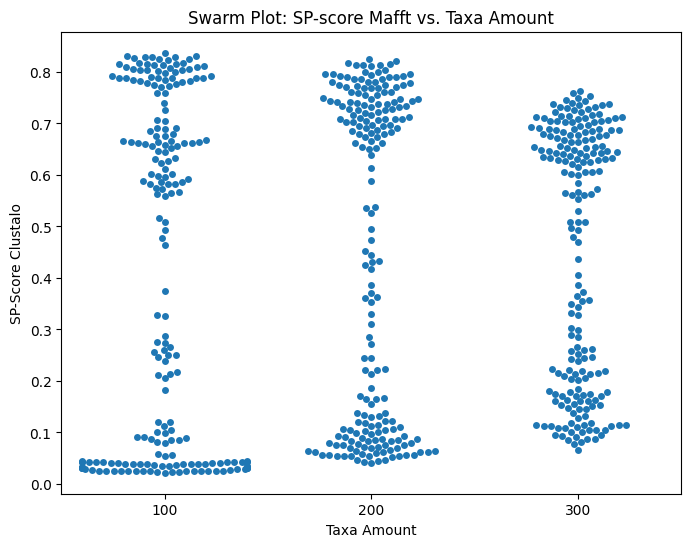

In [29]:
# Step 2: Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Taxa Amount', y='SP-Score Clustalo', data=df)
plt.title('Box Plot: SP-score Clustalo vs. Taxa Amount')
plt.show()

# Step 3: Plot the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Taxa Amount', y='SP-Score Clustalo', data=df)
plt.title('Violin Plot: SP-score Clustalo vs. Taxa Amount')
plt.show()

# Step 4: Plot the swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Taxa Amount', y='SP-Score Clustalo', data=df)
plt.title('Swarm Plot: SP-score CLustalo vs. Taxa Amount')
plt.show()

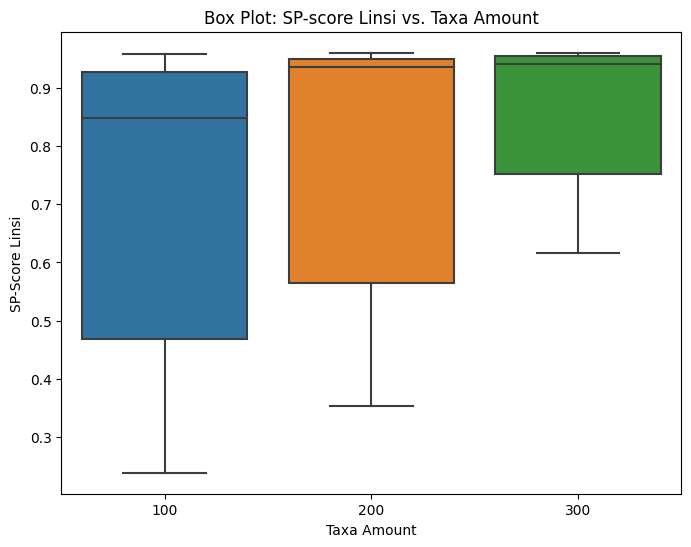

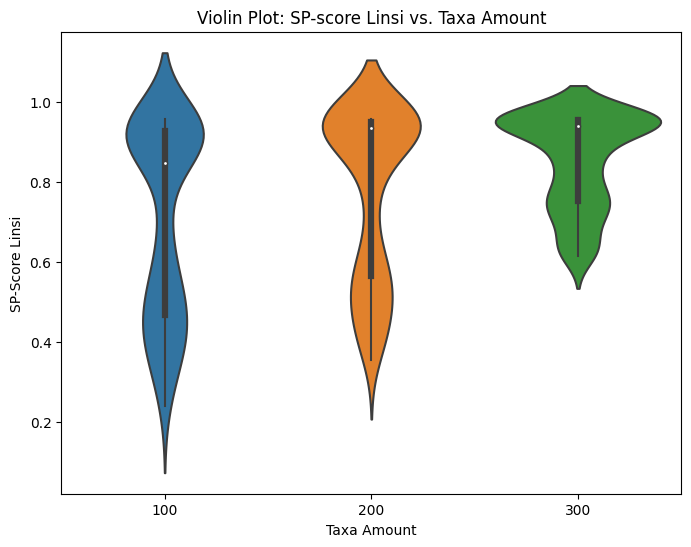

c:\Users\Carola\OneDrive\BRIDGE2023\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Carola\OneDrive\BRIDGE2023\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Carola\OneDrive\BRIDGE2023\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Carola\OneDrive\BRIDGE2023\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Carola\OneDrive\BRIDGE2023\Lib\site-packages\seaborn

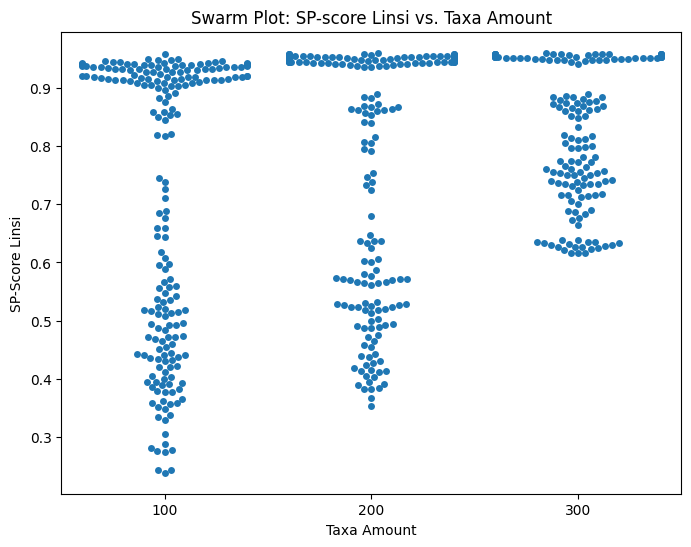

In [30]:
# Step 2: Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Taxa Amount', y='SP-Score Linsi', data=df)
plt.title('Box Plot: SP-score Linsi vs. Taxa Amount')
plt.show()

# Step 3: Plot the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Taxa Amount', y='SP-Score Linsi', data=df)
plt.title('Violin Plot: SP-score Linsi vs. Taxa Amount')
plt.show()

# Step 4: Plot the swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Taxa Amount', y='SP-Score Linsi', data=df)
plt.title('Swarm Plot: SP-score Linsi vs. Taxa Amount')
plt.show()

In [31]:
# Subset by Taxa Amount 

# Subset DataFrame for Taxa Amount == 100
df_taxa_100 = df[df['Taxa Amount'] == 100]

# Subset DataFrame for Taxa Amount == 200
df_taxa_200 = df[df['Taxa Amount'] == 200]

# Subset DataFrame for Taxa Amount == 300
df_taxa_300 = df[df['Taxa Amount'] == 300]

In [32]:
subset_T100_16_18 = df_taxa_100[(df_taxa_100['Diameter Range'] >= 1600) & (df_taxa_100['Diameter Range'] <= 1800)] # 300 cells
subset_T100_26_28 = df_taxa_100[(df_taxa_100['Diameter Range'] >= 2600) & (df_taxa_100['Diameter Range'] <= 2800)] # 300 cells
subset_T100_28_30 = df_taxa_100[(df_taxa_100['Diameter Range'] >= 2800) & (df_taxa_100['Diameter Range'] <= 3000)] # 300 cells
subset_T100_30_32 = df_taxa_100[(df_taxa_100['Diameter Range'] >= 3000) & (df_taxa_100['Diameter Range'] <= 3200)] # 300 cells

subset_T200_16_18 = df_taxa_200[(df_taxa_200['Diameter Range'] >= 1600) & (df_taxa_200['Diameter Range'] <= 1800)] # 300 cells
subset_T200_26_28 = df_taxa_200[(df_taxa_200['Diameter Range'] >= 2600) & (df_taxa_200['Diameter Range'] <= 2800)] # 300 cells
subset_T200_28_30 = df_taxa_200[(df_taxa_200['Diameter Range'] >= 2800) & (df_taxa_200['Diameter Range'] <= 3000)] # 300 cells
subset_T200_30_32 = df_taxa_200[(df_taxa_200['Diameter Range'] >= 3000) & (df_taxa_200['Diameter Range'] <= 3200)] # 300 cells

subset_T300_16_18 = df_taxa_300[(df_taxa_300['Diameter Range'] >= 1600) & (df_taxa_300['Diameter Range'] <= 1800)] # 300 cells
subset_T300_26_28 = df_taxa_300[(df_taxa_300['Diameter Range'] >= 2600) & (df_taxa_300['Diameter Range'] <= 2800)] # 300 cells
subset_T300_28_30 = df_taxa_300[(df_taxa_300['Diameter Range'] >= 2800) & (df_taxa_300['Diameter Range'] <= 3000)] # 300 cells
subset_T300_30_32 = df_taxa_300[(df_taxa_300['Diameter Range'] >= 3000) & (df_taxa_300['Diameter Range'] <= 3200)] # 300 cells


In [69]:
mafft_mean_sp_score_16_18_t3 = subset_T300_16_18['SP-Score Mafft'].mean()
mafft_mean_sp_score_26_28_t3 = subset_T300_26_28['SP-Score Mafft'].mean()
mafft_mean_sp_score_28_30_t3 = subset_T300_28_30['SP-Score Mafft'].mean()
mafft_mean_sp_score_30_32_t3 = subset_T300_30_32['SP-Score Mafft'].mean()

clustalo_mean_sp_score_16_18_t3 = subset_T300_16_18['SP-Score Clustalo'].mean()
clustalo_mean_sp_score_26_28_t3 = subset_T300_26_28['SP-Score Clustalo'].mean()
clustalo_mean_sp_score_28_30_t3 = subset_T300_28_30['SP-Score Clustalo'].mean()
clustalo_mean_sp_score_30_32_t3 = subset_T300_30_32['SP-Score Clustalo'].mean()


linsi_mean_sp_score_16_18_t3 = subset_T300_16_18['SP-Score Linsi'].mean()
linsi_mean_sp_score_26_28_t3 = subset_T300_26_28['SP-Score Linsi'].mean()
linsi_mean_sp_score_28_30_t3 = subset_T300_28_30['SP-Score Linsi'].mean()
linsi_mean_sp_score_30_32_t3 = subset_T300_30_32['SP-Score Linsi'].mean()

In [70]:
mafft_mean_sp_score_16_18_t2 = subset_T200_16_18['SP-Score Mafft'].mean()
mafft_mean_sp_score_26_28_t2 = subset_T200_26_28['SP-Score Mafft'].mean()
mafft_mean_sp_score_28_30_t2 = subset_T200_28_30['SP-Score Mafft'].mean()
mafft_mean_sp_score_30_32_t2 = subset_T200_30_32['SP-Score Mafft'].mean()

clustalo_mean_sp_score_16_18_t2 = subset_T200_16_18['SP-Score Clustalo'].mean()
clustalo_mean_sp_score_26_28_t2 = subset_T200_26_28['SP-Score Clustalo'].mean()
clustalo_mean_sp_score_28_30_t2 = subset_T200_28_30['SP-Score Clustalo'].mean()
clustalo_mean_sp_score_30_32_t2 = subset_T200_30_32['SP-Score Clustalo'].mean()


linsi_mean_sp_score_16_18_t2 = subset_T200_16_18['SP-Score Linsi'].mean()
linsi_mean_sp_score_26_28_t2 = subset_T200_26_28['SP-Score Linsi'].mean()
linsi_mean_sp_score_28_30_t2 = subset_T200_28_30['SP-Score Linsi'].mean()
linsi_mean_sp_score_30_32_t2 = subset_T200_30_32['SP-Score Linsi'].mean()

In [71]:
mafft_mean_sp_score_16_18_t1 = subset_T100_16_18['SP-Score Mafft'].mean()
mafft_mean_sp_score_26_28_t1 = subset_T100_26_28['SP-Score Mafft'].mean()
mafft_mean_sp_score_28_30_t1 = subset_T100_28_30['SP-Score Mafft'].mean()
mafft_mean_sp_score_30_32_t1 = subset_T100_30_32['SP-Score Mafft'].mean()

clustalo_mean_sp_score_16_18_t1 = subset_T100_16_18['SP-Score Clustalo'].mean()
clustalo_mean_sp_score_26_28_t1 = subset_T100_26_28['SP-Score Clustalo'].mean()
clustalo_mean_sp_score_28_30_t1 = subset_T100_28_30['SP-Score Clustalo'].mean()
clustalo_mean_sp_score_30_32_t1 = subset_T100_30_32['SP-Score Clustalo'].mean()


linsi_mean_sp_score_16_18_t1 = subset_T100_16_18['SP-Score Linsi'].mean()
linsi_mean_sp_score_26_28_t1 = subset_T100_26_28['SP-Score Linsi'].mean()
linsi_mean_sp_score_28_30_t1 = subset_T100_28_30['SP-Score Linsi'].mean()
linsi_mean_sp_score_30_32_t1 = subset_T100_30_32['SP-Score Linsi'].mean()

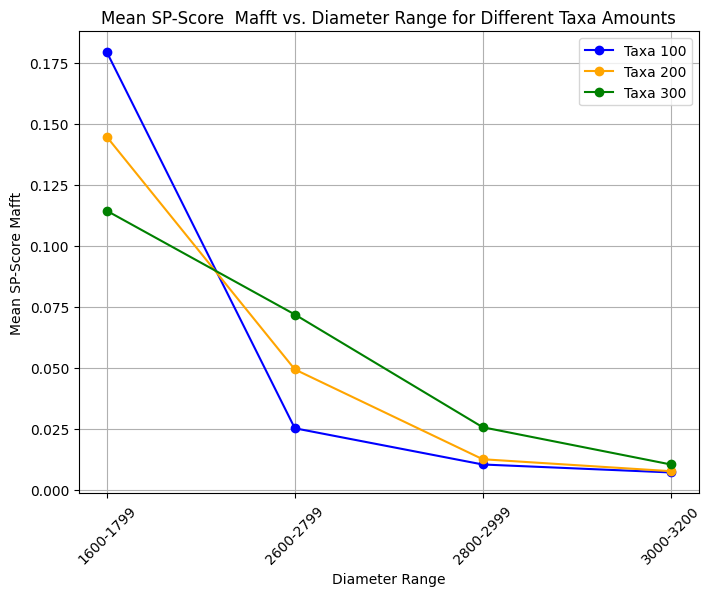

In [73]:
# Given mean SP-Scores and diameter range labels for each taxa subset
mean_sp_scores_t1_m = [mafft_mean_sp_score_16_18_t1, mafft_mean_sp_score_26_28_t1, mafft_mean_sp_score_28_30_t1, mafft_mean_sp_score_30_32_t1]
mean_sp_scores_t2_m = [mafft_mean_sp_score_16_18_t2, mafft_mean_sp_score_26_28_t2, mafft_mean_sp_score_28_30_t2, mafft_mean_sp_score_30_32_t2]
mean_sp_scores_t3_m = [mafft_mean_sp_score_16_18_t3, mafft_mean_sp_score_26_28_t3, mafft_mean_sp_score_28_30_t3, mafft_mean_sp_score_30_32_t3]
diameter_ranges = ['1600-1799', '2600-2799', '2800-2999', '3000-3200']

# Create line graph for all three taxa subsets
plt.figure(figsize=(8, 6))

plt.plot(diameter_ranges, mean_sp_scores_t1_m, marker='o', label='Taxa 100', color='blue')
plt.plot(diameter_ranges, mean_sp_scores_t2_m, marker='o', label='Taxa 200', color='orange')
plt.plot(diameter_ranges, mean_sp_scores_t3_m, marker='o', label='Taxa 300', color='green')

plt.xlabel('Diameter Range')
plt.ylabel('Mean SP-Score Mafft')
plt.title('Mean SP-Score  Mafft vs. Diameter Range for Different Taxa Amounts')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()


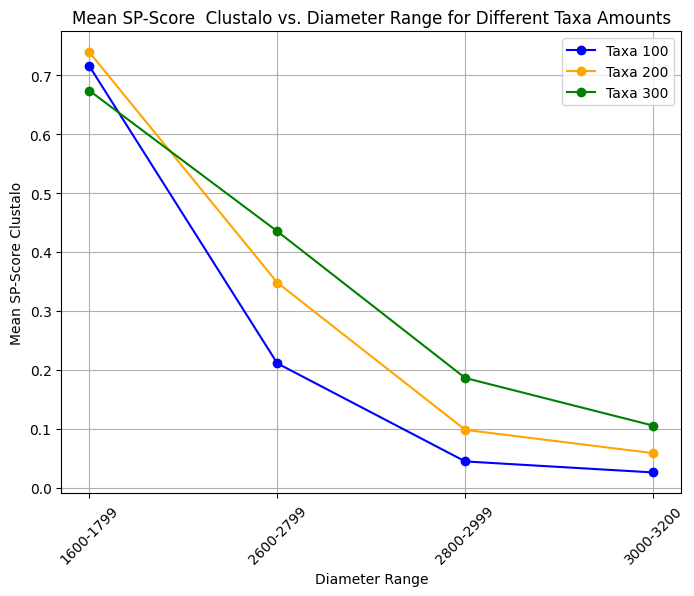

In [74]:
# Given mean SP-Scores and diameter range labels for each taxa subset
mean_sp_scores_t1_c = [clustalo_mean_sp_score_16_18_t1, clustalo_mean_sp_score_26_28_t1, clustalo_mean_sp_score_28_30_t1, clustalo_mean_sp_score_30_32_t1]
mean_sp_scores_t2_c = [clustalo_mean_sp_score_16_18_t2, clustalo_mean_sp_score_26_28_t2, clustalo_mean_sp_score_28_30_t2, clustalo_mean_sp_score_30_32_t2]
mean_sp_scores_t3_c = [clustalo_mean_sp_score_16_18_t3, clustalo_mean_sp_score_26_28_t3, clustalo_mean_sp_score_28_30_t3, clustalo_mean_sp_score_30_32_t3]
diameter_ranges = ['1600-1799', '2600-2799', '2800-2999', '3000-3200']

# Create line graph for all three taxa subsets
plt.figure(figsize=(8, 6))

plt.plot(diameter_ranges, mean_sp_scores_t1_c, marker='o', label='Taxa 100', color='blue')
plt.plot(diameter_ranges, mean_sp_scores_t2_c, marker='o', label='Taxa 200', color='orange')
plt.plot(diameter_ranges, mean_sp_scores_t3_c, marker='o', label='Taxa 300', color='green')

plt.xlabel('Diameter Range')
plt.ylabel('Mean SP-Score Clustalo')
plt.title('Mean SP-Score  Clustalo vs. Diameter Range for Different Taxa Amounts')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()


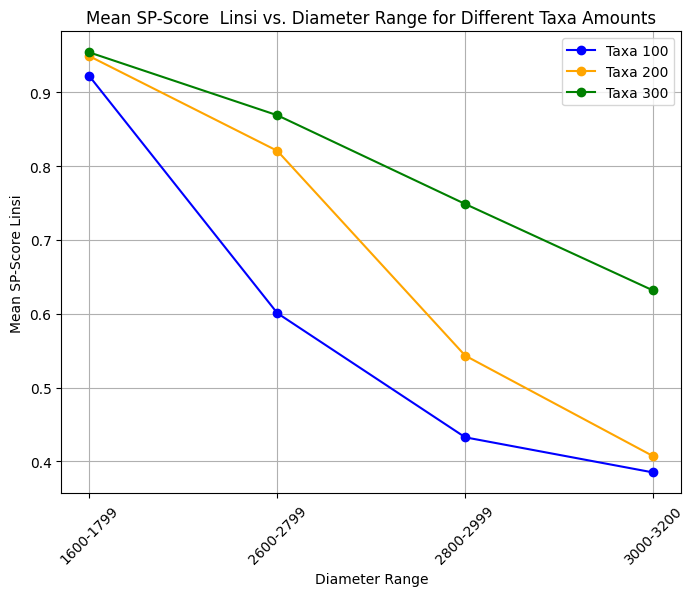

In [75]:
# Given mean SP-Scores and diameter range labels for each taxa subset
mean_sp_scores_t1_l = [linsi_mean_sp_score_16_18_t1, linsi_mean_sp_score_26_28_t1, linsi_mean_sp_score_28_30_t1, linsi_mean_sp_score_30_32_t1]
mean_sp_scores_t2_l = [linsi_mean_sp_score_16_18_t2, linsi_mean_sp_score_26_28_t2, linsi_mean_sp_score_28_30_t2, linsi_mean_sp_score_30_32_t2]
mean_sp_scores_t3_l = [linsi_mean_sp_score_16_18_t3, linsi_mean_sp_score_26_28_t3, linsi_mean_sp_score_28_30_t3, linsi_mean_sp_score_30_32_t3]
diameter_ranges = ['1600-1799', '2600-2799', '2800-2999', '3000-3200']

# Create line graph for all three taxa subsets
plt.figure(figsize=(8, 6))

plt.plot(diameter_ranges, mean_sp_scores_t1_l, marker='o', label='Taxa 100', color='blue')
plt.plot(diameter_ranges, mean_sp_scores_t2_l, marker='o', label='Taxa 200', color='orange')
plt.plot(diameter_ranges, mean_sp_scores_t3_l, marker='o', label='Taxa 300', color='green')

plt.xlabel('Diameter Range')
plt.ylabel('Mean SP-Score Linsi')
plt.title('Mean SP-Score  Linsi vs. Diameter Range for Different Taxa Amounts')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()

### Comparison of Alignment Tools

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Calculate Average SP-Scores for each Alignment Tool
average_sp_scores = df[['SP-Score Mafft', 'SP-Score Linsi', 'SP-Score Clustalo']].mean()
average_sp_scores_sorted = average_sp_scores.sort_values(ascending=False)
print("Average SP-Scores (Highest to Lowest):")
print(average_sp_scores_sorted)

# Calculate Median SP-Scores for each Alignment Tool
median_sp_scores = df[['SP-Score Mafft', 'SP-Score Linsi', 'SP-Score Clustalo']].median()
median_sp_scores_sorted = median_sp_scores.sort_values(ascending=False)
print("\nMedian SP-Scores (Highest to Lowest):")
print(median_sp_scores_sorted)

# Calculate Standard Deviation of SP-Scores for each Alignment Tool
std_sp_scores = df[['SP-Score Mafft', 'SP-Score Linsi', 'SP-Score Clustalo']].std()
std_sp_scores_sorted = std_sp_scores.sort_values(ascending=False)
print("\nStandard Deviation of SP-Scores (Highest to Lowest):")
print(std_sp_scores_sorted)


Average SP-Scores (Highest to Lowest):
SP-Score Linsi       0.775986
SP-Score Clustalo    0.437459
SP-Score Mafft       0.085155
dtype: float64

Median SP-Scores (Highest to Lowest):
SP-Score Linsi       0.883643
SP-Score Clustalo    0.561176
SP-Score Mafft       0.073193
dtype: float64

Standard Deviation of SP-Scores (Highest to Lowest):
SP-Score Clustalo    0.295124
SP-Score Linsi       0.206540
SP-Score Mafft       0.089388
dtype: float64


In [63]:

# Determine the best tool for each tree (highest SP-Score)
df['Best_Tool'] = df[['SP-Score Mafft', 'SP-Score Linsi', 'SP-Score Clustalo']].idxmax(axis=1)


# Count the number of wins for each tool
tool_wins = df['Best_Tool'].value_counts()



# Calculate the total number of trees
total_trees = df.shape[0]

# Calculate the percentage of wins for each tool
percentage_wins = (tool_wins / total_trees) * 100


# Print the results
print("Wins Over Other Tools:")
print(tool_wins)
print("\nPercentage of Wins:")
print(percentage_wins)



Wins Over Other Tools:
Best_Tool
SP-Score Linsi    597
Name: count, dtype: int64

Percentage of Wins:
Best_Tool
SP-Score Linsi    100.0
Name: count, dtype: float64


In [64]:
# Calculate correlation coefficients: 

#As the "Diameter Range" increases within this range, the "SP-Score" tends to decrease.
correlation_100taxa_mafft = df_taxa_100['Diameter Range'].corr(df_taxa_100['SP-Score Mafft']) 

correlation_200taxa_mafft = df_taxa_200['Diameter Range'].corr(df_taxa_200['SP-Score Mafft']) 

correlation_300taxa_mafft = df_taxa_300['Diameter Range'].corr(df_taxa_300['SP-Score Mafft']) 

print(f"Correlation Coefficient 100 Taxa for Mafft: {correlation_100taxa_mafft}")
print(f"Correlation Coefficient 200 Taxa for Mafft: {correlation_200taxa_mafft}")
print(f"Correlation Coefficient 300 Taxa for Mafft: {correlation_300taxa_mafft}")

Correlation Coefficient 100 Taxa for Mafft: -0.686502040547857
Correlation Coefficient 200 Taxa for Mafft: -0.8276157345809046
Correlation Coefficient 300 Taxa for Mafft: -0.8400722375728309


In [65]:
# Calculate correlation coefficients: 

#As the "Diameter Range" increases within this range, the "SP-Score" tends to decrease.
correlation_100taxa_clustalo = df_taxa_100['Diameter Range'].corr(df_taxa_100['SP-Score Clustalo']) 

correlation_200taxa_clustalo = df_taxa_200['Diameter Range'].corr(df_taxa_200['SP-Score Clustalo']) 

correlation_300taxa_clustalo = df_taxa_300['Diameter Range'].corr(df_taxa_300['SP-Score Clustalo']) 

print(f"Correlation Coefficient 100 Taxa for Clustalo: {correlation_100taxa_clustalo}")
print(f"Correlation Coefficient 200 Taxa for Clusatlo: {correlation_200taxa_clustalo}")
print(f"Correlation Coefficient 300 Taxa for Clustalo: {correlation_300taxa_clustalo}")

Correlation Coefficient 100 Taxa for Clustalo: -0.9708144733846202
Correlation Coefficient 200 Taxa for Clusatlo: -0.9774460653877591
Correlation Coefficient 300 Taxa for Clustalo: -0.9546633228859053


In [66]:
# Calculate correlation coefficients: 

#As the "Diameter Range" increases within this range, the "SP-Score" tends to decrease.
correlation_100taxa_linsi = df_taxa_100['Diameter Range'].corr(df_taxa_100['SP-Score Linsi']) 

correlation_200taxa_linsi = df_taxa_200['Diameter Range'].corr(df_taxa_200['SP-Score Linsi']) 

correlation_300taxa_linsi = df_taxa_300['Diameter Range'].corr(df_taxa_300['SP-Score Linsi']) 

print(f"Correlation Coefficient 100 Taxa for linsi: {correlation_100taxa_linsi}")
print(f"Correlation Coefficient 200 Taxa for linsi: {correlation_200taxa_linsi}")
print(f"Correlation Coefficient 300 Taxa for linsi: {correlation_300taxa_linsi}")

Correlation Coefficient 100 Taxa for linsi: -0.9577449376839516
Correlation Coefficient 200 Taxa for linsi: -0.9234838362365918
Correlation Coefficient 300 Taxa for linsi: -0.9290793047275844
